# Perceptron

### Prediction

$$
\begin{align*}
h(\mathbf{x}) &= \mathbf{w^\intercal x} + b \\
y &= \theta(h(\mathbf{x})) \\
\theta(x) &= \begin{cases}
        1 &  x \ge 0\\
        0 & x < 0 \\
    \end{cases} \\
\end{align*}
$$

### Gradient descent updates
$$
\begin{align*}
\Delta \mathbf{w} &= (y_i - \hat{y}_i) \cdot \mathbf{x}_i\\
\Delta b &= y_i - \hat{y}_i\\
\mathbf{w}_{t + 1} &= \mathbf{w}_{t} + \alpha \Delta \mathbf{w} \\
b_{t + 1} &= b_{t} + \alpha \Delta b \\
\end{align*}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:

    def __init__(self, lr=1e-1, max_iter=1000, optimization="bgd"):
        self.lr = lr
        self.max_iter = max_iter
        self.optimization = optimization

    def fit(self, X, y):

        self.X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.y = y.reshape(-1)

        n_features = self.X.shape[1]

        self.weights = np.zeros(n_features)

        if self.optimization == "sgd":

            for i in range(self.max_iter):

                for idx, x in enumerate(self.X):

                    y_pred = self.activation(np.dot(x, self.weights))
                    
                    dw = (self.y[idx] - y_pred) * x

                    self.weights += self.lr * dw

        elif self.optimization == "bgd":

            for i in range(self.max_iter):

                y_pred = self.activation(np.dot(self.X, self.weights))
                    
                dw = np.dot(self.X.T, (self.y - y_pred))

                self.weights += self.lr * dw

    def predict(self, X):
        pred = np.dot(np.hstack([np.ones((X.shape[0], 1)), X]), self.weights)
        return self.activation(pred)
    
    def activation(self, x):
        return np.where(x >= 0, 1, 0)
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

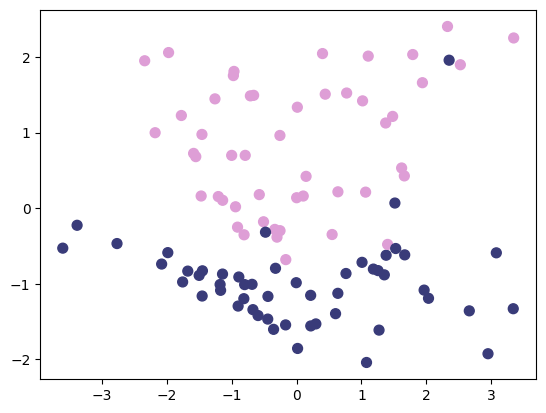

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_samples=100, n_clusters_per_class=2)
plot_2d_clf_problem(X, y)

Accuracy: 0.8


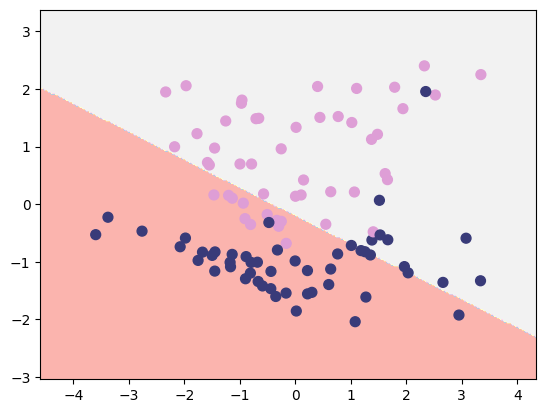

In [10]:
model = Perceptron(optimization="sgd", lr=1e-1, max_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)
print(f'Accuracy: {model.accuracy(X, y)}')
plot_2d_clf_problem(X, y, model.predict)